# SQLIteについて

SQLiteは、初心者にも扱いやすい「組み込み型」のデータベースです。  

1. <u>データベースとは？</u>  
データを整理して保存する「ノート」のようなもの  
たとえば、顧客リストや商品リストなどを表形式で保存できる  

2. <u> SQLiteの特徴</u>  
インストール不要：特別なサーバーを用意しなくても、プログラムと一緒に使える  
ファイル1つで管理：データは1つのファイル（例：sample.db）に保存される  
軽量・高速：小規模なアプリや学習用途に最適  

3.  <u>使い方のイメージ</u>  
Pythonや他のプログラムから簡単に使える  
例：Pythonでの利用  
    ```python
    import sqlite3
    conn = sqlite3.connect('sample.db')  # データベースファイルを作成・接続
    c = conn.cursor()
    c.execute('CREATE TABLE users (id INTEGER, name TEXT)')
    c.execute('INSERT INTO users VALUES (1, "Alice")')
    conn.commit()
    conn.close()
    ```

4.  <u>どんなときに使う？</u>  
小さなアプリや個人用ツール  
学習やテスト用  
サーバーを立てずにデータを保存したいとき 

 <u>まとめ</u>  
SQLiteは「簡単に使えるノート型データベース」。  
プログラムと一緒に持ち運べて、初心者でもすぐに始められます。

# ライブラリのインポート

In [ ]:
import sqlite3
import pandas as pd

# csvファイルからデータをインポート

In [ ]:
cc = pd.read_csv('../../01_src/.data/customer_cases.csv', index_col=0)
ci = pd.read_csv('../../01_src/.data/customer_info.csv', index_col=0)
cp = pd.read_csv('../../01_src/.data/customer_product.csv', index_col=0)
pi = pd.read_csv('../../01_src/.data/product_info.csv')

print("~~~~~~~~~~~~~~~ Customer Cases ~~~~~~~~~~~~~~~")
display(cc)
print("\n~~~~~~~~~~~~~~~~ Customer Info ~~~~~~~~~~~~~~~ ")
display(ci)
print("\n~~~~~~~~~~~~~~~ Customer Product ~~~~~~~~~~~~~~~")
display(cp)
print("\n~~~~~~~~~~~~~~~~ Product Info ~~~~~~~~~~~~~~~")
display(pi)

~~~~~~~~~~~~~~~ Customer Cases ~~~~~~~~~~~~~~~


,case_id,date_time,customer_id,channel,reason
1,CC101,2017-01-01 10:32:03,C2448,phone,signup
2,CC102,2017-01-01 11:35:47,C2449,phone,signup
3,CC103,2017-01-01 11:37:09,C2450,phone,signup
4,CC104,2017-01-01 13:28:14,C2451,phone,signup
5,CC105,2017-01-01 13:52:22,C2452,phone,signup
...,...,...,...,...,...
330508,CC330608,2021-12-31 19:16:28,C173079,email,support
330509,CC330609,2021-12-31 19:36:42,C497581,email,support
330510,CC330610,2021-12-31 20:30:02,C127630,email,support
330511,CC330611,2021-12-31 21:30:00,C497538,email,support



~~~~~~~~~~~~~~~~ Customer Info ~~~~~~~~~~~~~~~ 


,customer_id,age,gender
1,C2448,76,female
2,C2449,61,male
3,C2450,58,female
4,C2451,62,female
5,C2452,71,male
...,...,...,...
508928,C511375,53,male
508929,C511376,60,male
508930,C511377,67,female
508931,C511378,49,male



~~~~~~~~~~~~~~~ Customer Product ~~~~~~~~~~~~~~~


,customer_id,product,signup_date_time,cancel_date_time
1,C2448,prd_1,2017-01-01 10:35:09,NaN
2,C2449,prd_1,2017-01-01 11:39:29,2021-09-05 10:00:02
3,C2450,prd_1,2017-01-01 11:42:00,2019-01-13 16:24:55
4,C2451,prd_2,2017-01-01 13:32:08,NaN
5,C2452,prd_1,2017-01-01 13:57:30,2021-06-28 18:06:01
...,...,...,...,...
508928,C511375,prd_2,2021-12-31 18:37:58,NaN
508929,C511376,prd_2,2021-12-31 18:42:00,NaN
508930,C511377,prd_2,2021-12-31 18:50:53,NaN
508931,C511378,prd_2,2021-12-31 19:00:38,NaN



~~~~~~~~~~~~~~~~ Product Info ~~~~~~~~~~~~~~~


,product_id,name,price,billing_cycle
0,prd_1,annual_subscription,1200,12
1,prd_2,monthly_subscription,125,1


## 今回用いるテーブルのリレーション図
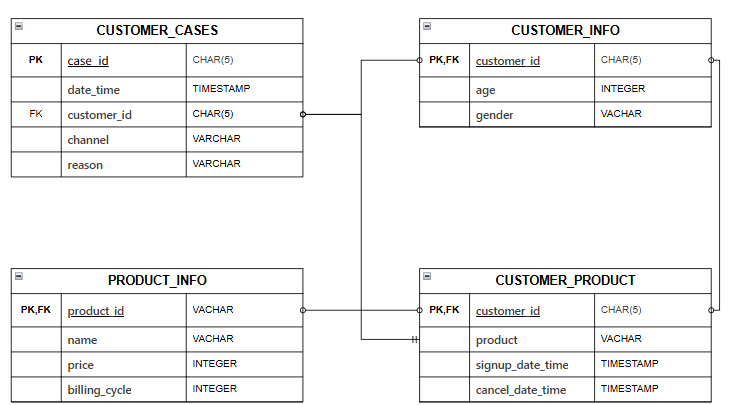

# DB操作

インポートしたcustomer_casesを例に一連のDB動作をしてみる

## DBへの接続

In [58]:
# データベースに接続
conn = sqlite3.connect('CustomerSubscription.db')

In [59]:
# カーソルを作成
# カーソルとは、データベースに対する操作を行うためのオブジェクトです。
cursor = conn.cursor()

## テーブル作成

In [60]:
#  テーブルの作成
query = """
CREATE TABLE CUSTOMER_CASES (
    case_id     CHAR(5) PRIMARY KEY,
    date_time   TIMESTAMP,
    customer_id CHAR(5),
    channel     VARCHAR,
    reason      VARCHAR,
    FOREIGN KEY (customer_id) REFERENCES CUSTOMER_INFO(customer_id)
);
"""

# テーブルを作成する
cursor.execute(query)

In [61]:
# テーブル一覧を取得するクエリ
select_tables_query = """
SELECT name FROM sqlite_master WHERE type='table';
"""
# テーブル一覧を取得  
cursor.execute(select_tables_query)
cursor.fetchall() # 取得したデータを表示

[('CUSTOMER_CASES',)]

## データを挿入する

In [62]:
# データを挿入するためのクエリを作成
insert_query = """
INSERT INTO 
    CUSTOMER_CASES (
        case_id, date_time, customer_id, channel, reason
    )
VALUES (?, ?, ?, ?, ?);
"""

In [63]:
# データを挿入
# ここでは、例として1件のデータを挿入します。
cursor.execute(
    insert_query,
    ("CC102", "2017-01-01 11:35:47", "C2449", "phone", "signup" )
    )

## データを抽出する

In [64]:
select_query = "SELECT * FROM CUSTOMER_CASES" # データを取得するためのクエリを作成
cursor.execute(select_query) # データを取得
cursor.fetchall() # 取得したデータを表示


[('CC102', '2017-01-01 11:35:47', 'C2449', 'phone', 'signup')]

## コミットして変更を保存

In [65]:
# コミットして変更を保存
conn.commit()

## データを削除する

In [66]:
# SELECT クエリを実行してデータを取得
cursor.execute(select_query) # データを取得
cursor.fetchall() # 取得したデータを表示

[('CC102', '2017-01-01 11:35:47', 'C2449', 'phone', 'signup')]

In [67]:
# DELETE クエリを実行してデータを削除
delete_query = "DELETE FROM CUSTOMER_CASES WHERE case_id = 'CC102'" # データを削除するためのクエリを作成
cursor.execute(delete_query) # データを削除 

In [68]:
# SELECT クエリを実行してデータを取得
cursor.execute(select_query) # データを取得
rows = cursor.fetchall() # 取得したデータを表示
print(rows) # データを表示

[]


## テーブルを削除する

In [69]:
# テーブルがあることを確認
cursor.execute(select_tables_query)
cursor.fetchall()  # テーブル一覧を再取得

[('CUSTOMER_CASES',)]

In [70]:
# DROP テーブルを実行して CUSTOMER_CASES テーブルを削除
drop_query = "DROP TABLE IF EXISTS CUSTOMER_CASES"  
cursor.execute(drop_query)  # テーブルを削除

In [71]:
# テーブルが削除されたことを確認
cursor.execute(select_tables_query)
cursor.fetchall()  # テーブル一覧を再取得

[]

## DBへの接続を閉じる

In [72]:
# コミットして変更を保存
conn.commit()

In [73]:
# データベース接続を閉じる
conn.close()

# 各テーブルを作成する

## CUSTOMER CASES

In [74]:
conn = sqlite3.connect('CustomerSubscription.db')  # データベースに接続
cursor = conn.cursor()  # 再度カーソルを作成

In [75]:
#  テーブルの作成
query = """
CREATE TABLE CUSTOMER_CASES (
    case_id     CHAR(5) PRIMARY KEY,
    date_time   TIMESTAMP,
    customer_id CHAR(5) NOT NULL,
    channel     VARCHAR,
    reason      VARCHAR,
    FOREIGN KEY (customer_id) REFERENCES CUSTOMER_INFO(customer_id),
    FOREIGN KEY (case_id) REFERENCES CUSTOMER_PRODUCT(case_id)
);
"""

# テーブルを作成する
cursor.execute(query)

In [76]:
# データを挿入するためのクエリを作成
insert_query = """
INSERT INTO 
    CUSTOMER_CASES (
        case_id, date_time, customer_id, channel, reason
    )
VALUES (?, ?, ?, ?, ?);
"""

In [77]:
# データを挿入するためのクエリを作成
# for文を使って、ccの各行をDBへ1行ずつ追加する
for _, row in cc.iterrows():
    # 各行（Series）からカラム別に値を取り出し、
    # INSERT 文を使ってDBへ1行ずつ追加している
    cursor.execute(insert_query, (
        row['case_id'],           # 第一カラム
        row['date_time'],         # 時刻
        row['customer_id'],       # 顧客ID
        row['channel'],           # チャンネル
        row['reason']             # 理由
    ))


In [78]:
# データが挿入されたか確認する
query = "SELECT * FROM CUSTOMER_CASES"  # データを取得するためのクエリを作成
# データを取得  
cursor.execute(query)  # データを取得
cursor.fetchall()  # 取得したデータを表示

[('CC101', '2017-01-01 10:32:03', 'C2448', 'phone', 'signup'),
 ('CC102', '2017-01-01 11:35:47', 'C2449', 'phone', 'signup'),
 ('CC103', '2017-01-01 11:37:09', 'C2450', 'phone', 'signup'),
 ('CC104', '2017-01-01 13:28:14', 'C2451', 'phone', 'signup'),
 ('CC105', '2017-01-01 13:52:22', 'C2452', 'phone', 'signup'),
 ('CC106', '2017-01-01 15:23:02', 'C2453', 'phone', 'signup'),
 ('CC107', '2017-01-01 15:30:36', 'C2454', 'phone', 'signup'),
 ('CC108', '2017-01-02 08:57:09', 'C2455', 'phone', 'signup'),
 ('CC109', '2017-01-02 09:17:09', 'C2456', 'phone', 'signup'),
 ('CC110', '2017-01-02 09:22:17', 'C2457', 'phone', 'signup'),
 ('CC111', '2017-01-02 09:43:11', 'C2458', 'phone', 'signup'),
 ('CC112', '2017-01-02 09:48:17', 'C2459', 'phone', 'signup'),
 ('CC113', '2017-01-02 10:09:12', 'C2460', 'phone', 'signup'),
 ('CC114', '2017-01-02 10:10:41', 'C2461', 'phone', 'signup'),
 ('CC115', '2017-01-02 10:17:27', 'C2462', 'phone', 'signup'),
 ('CC116', '2017-01-02 10:40:57', 'C2463', 'phone', 'si

In [79]:
# drop_query = "DROP TABLE IF EXISTS CUSTOMER_CASES"  # テーブルを削除するためのクエリを作成
# cursor.execute(drop_query)  # テーブルを削除

In [80]:
# commitして変更を保存
conn.commit()   
# 接続を閉じる
conn.close() 

## CUSTOMER INFO

In [81]:
conn = sqlite3.connect('CustomerSubscription.db')  # データベースに接続
cursor = conn.cursor()  # 再度カーソルを作成    

In [82]:
create_query = """
CREATE TABLE CUSTOMER_INFO (
    customer_id CHAR(5) PRIMARY KEY,
    age INTEGER,
    gender VARCHAR,
    FOREIGN KEY (customer_id) REFERENCES CUSTOMER_CASES(customer_id),
    FOREIGN KEY (customer_id) REFERENCES CUSTOMER_PRODUCT(customer_id)
);
"""

cursor.execute(create_query)  # テーブルを作成する

In [83]:
insert_query = """
INSERT INTO
    CUSTOMER_INFO (
        customer_id, age, gender
    )
VALUES (?, ?, ?);
"""

for _, row in ci.iterrows():
    cursor.execute(
            insert_query,
            (
                row['customer_id'],
                row['age'],
                row['gender']        
            )
    )

In [84]:
select_query = "SELECT * FROM CUSTOMER_INFO"  # データを取得するためのクエリを作成
cursor.execute(select_query)  # データを取得
cursor.fetchall()  # 取得したデータを表示

[('C2448', 76, 'female'),
 ('C2449', 61, 'male'),
 ('C2450', 58, 'female'),
 ('C2451', 62, 'female'),
 ('C2452', 71, 'male'),
 ('C2453', 56, 'male'),
 ('C2454', 53, 'male'),
 ('C2455', 53, 'female'),
 ('C2456', 70, 'female'),
 ('C2457', 68, 'male'),
 ('C2458', 64, 'male'),
 ('C2459', 62, 'female'),
 ('C2460', 54, 'male'),
 ('C2461', 42, 'female'),
 ('C2462', 34, 'female'),
 ('C2463', 51, 'male'),
 ('C2464', 55, 'male'),
 ('C2465', 40, 'female'),
 ('C2466', 52, 'male'),
 ('C2467', 46, 'female'),
 ('C2468', 64, 'male'),
 ('C2469', 66, 'male'),
 ('C2470', 55, 'female'),
 ('C2471', 62, 'male'),
 ('C2472', 55, 'male'),
 ('C2473', 52, 'male'),
 ('C2474', 65, 'male'),
 ('C2475', 55, 'male'),
 ('C2476', 55, 'male'),
 ('C2477', 46, 'male'),
 ('C2478', 30, 'female'),
 ('C2479', 55, 'male'),
 ('C2480', 52, 'male'),
 ('C2481', 51, 'male'),
 ('C2482', 37, 'male'),
 ('C2483', 61, 'male'),
 ('C2484', 41, 'male'),
 ('C2485', 56, 'female'),
 ('C2486', 42, 'female'),
 ('C2487', 62, 'female'),
 ('C2488',

In [85]:
# drop_query = "DROP TABLE IF EXISTS CUSTOMER_INFO"  # テーブルを削除するためのクエリを作成
# cursor.execute(drop_query)  # テーブルを削除

In [86]:
conn.commit()  # commitして変更を保存
conn.close()  # 接続を閉じる

## CUSTOMER PRODUCT

In [87]:
conn = sqlite3.connect('CustomerSubscription.db')  # データベースに接続
cursor = conn.cursor()  # 再度カーソルを作成

In [88]:
create_query = """
CREATE TABLE CUSTOMER_PRODUCT (
    customer_id CHAR(5) PRIMARY KEY,
    product_id CHAR(5) NOT NULL,
    signup_date_time TIMESTAMP,
    cancel_date_time TIMESTAMP,
    FOREIGN KEY (customer_id) REFERENCES CUSTOMER_CASES(customer_id),
    FOREIGN KEY (customer_id) REFERENCES CUSTOMER_INFO(customer_id),
    FOREIGN KEY (product_id) REFERENCES PRODUCT_INFO(product_id)
);
"""
cursor.execute(create_query)  # テーブルを作成する

In [89]:
insert_query = """
INSERT INTO 
    CUSTOMER_PRODUCT (
        customer_id, product_id, signup_date_time, cancel_date_time
    )  
VALUES (?, ?, ?, ?);
"""

for _, row in cp.iterrows():
    cursor.execute(
        insert_query,
        (
            row['customer_id'],
            row['product'], 
            row['signup_date_time'],
            row['cancel_date_time']
        )
    )   

In [90]:
select_query = "SELECT * FROM CUSTOMER_PRODUCT"  # データを取得するためのクエリを作成
cursor.execute(select_query)  # データを取得
cursor.fetchall()  # 取得したデータを表示

[('C2448', 'prd_1', '2017-01-01 10:35:09', None),
 ('C2449', 'prd_1', '2017-01-01 11:39:29', '2021-09-05 10:00:02'),
 ('C2450', 'prd_1', '2017-01-01 11:42:00', '2019-01-13 16:24:55'),
 ('C2451', 'prd_2', '2017-01-01 13:32:08', None),
 ('C2452', 'prd_1', '2017-01-01 13:57:30', '2021-06-28 18:06:01'),
 ('C2453', 'prd_1', '2017-01-01 15:26:14', None),
 ('C2454', 'prd_1', '2017-01-01 15:35:03', '2021-06-01 17:09:40'),
 ('C2455', 'prd_1', '2017-01-02 09:01:31', None),
 ('C2456', 'prd_1', '2017-01-02 09:21:04', '2017-06-08 15:57:45'),
 ('C2457', 'prd_1', '2017-01-02 09:26:42', '2017-11-25 12:55:05'),
 ('C2458', 'prd_1', '2017-01-02 09:46:09', '2019-01-30 20:59:53'),
 ('C2459', 'prd_2', '2017-01-02 09:53:40', '2018-10-14 17:54:53'),
 ('C2460', 'prd_1', '2017-01-02 10:12:13', None),
 ('C2461', 'prd_1', '2017-01-02 10:15:48', None),
 ('C2462', 'prd_1', '2017-01-02 10:20:19', None),
 ('C2463', 'prd_1', '2017-01-02 10:45:21', '2019-02-13 15:12:34'),
 ('C2464', 'prd_1', '2017-01-02 10:46:02', None

In [91]:
# drop_query = "DRP TABLE IF EXISTS CUSTOMER_PRODUCT"  # テーブルを削除するためのクエリを作成
# cursor.execute(drop_query)  # テーブルを削除

In [92]:

conn.commit()  # commitして変更を保存
conn.close()  # 接続を閉じる

## PRODUCT INFO 

In [93]:
conn = sqlite3.connect('CustomerSubscription.db')  # データベースに接続
cursor = conn.cursor()  # 再度カーソルを作成

In [94]:
create_query = """
CREATE TABLE PRODUCT_INFO (
    product_id CHAR(5) PRIMARY KEY,
    name VARCHAR,
    price INTEGER,
    billing_cycle INTEGER,
    FOREIGN KEY (product_id) REFERENCES CUSTOMER_PRODUCT(product_id)
);
"""
cursor.execute(create_query)  # テーブルを作成する

In [95]:
insert_query = """
INSERT INTO 
    PRODUCT_INFO(
        product_id, name, price, billing_cycle
    )  
VALUES (?, ?, ?, ?);
"""

for _, row in pi.iterrows():
    cursor.execute(
        insert_query,
        (
            row['product_id'],           # product_id from index
            row['name'],
            row['price'],
            row['billing_cycle']
        )
    )


In [96]:
select_query = "SELECT * FROM PRODUCT_INFO"  # データを取得するためのクエリを作成
cursor.execute(select_query)  # データを取得   
cursor.fetchall()  # 取得したデータを表示

[('prd_1', 'annual_subscription', 1200, 12),
 ('prd_2', 'monthly_subscription', 125, 1)]

In [97]:
# drop_query = "DROP TABLE IF EXISTS PRODUCT_INFO"  # テーブルを削除するためのクエリを作成
# cursor.execute(drop_query)  # テーブルを削除

In [98]:
conn.commit()  # commitして変更を保存
conn.close()  # 接続を閉じる

# データ抽出

## pandasのread_sql_queryメソッドを利用してデータを取得してみる

In [2]:
conn = sqlite3.connect('CustomerSubscription.db')  # データベースに接続

### SELECT

In [3]:
# 最初の10件のデータを取得するクエリ
query = """
select *
from CUSTOMER_CASES
LIMIT 10;
"""
pd.read_sql_query(query, conn)  # データを取得して表示

,case_id,date_time,customer_id,channel,reason
0,CC101,2017-01-01 10:32:03,C2448,phone,signup
1,CC102,2017-01-01 11:35:47,C2449,phone,signup
2,CC103,2017-01-01 11:37:09,C2450,phone,signup
3,CC104,2017-01-01 13:28:14,C2451,phone,signup
4,CC105,2017-01-01 13:52:22,C2452,phone,signup
5,CC106,2017-01-01 15:23:02,C2453,phone,signup
6,CC107,2017-01-01 15:30:36,C2454,phone,signup
7,CC108,2017-01-02 08:57:09,C2455,phone,signup
8,CC109,2017-01-02 09:17:09,C2456,phone,signup
9,CC110,2017-01-02 09:22:17,C2457,phone,signup


### DISTINCT

In [4]:
# reason列をdistinctに取得するクエリ
query = """
select distinct reason
from CUSTOMER_CASES;
""" 
pd.read_sql_query(query, conn)  # データを取得して表示

,reason
0,signup
1,support


### COUNT

In [5]:
# レコード数をカウントするクエリ
query = """
select count(*)
from CUSTOMER_CASES;
""" 
pd.read_sql_query(query, conn)  # データを取得して表示

,count(*)
0,330512


### GROUP BY

In [6]:
# channelごとの件数を集計するクエリ
query = """
select 
    channel,
    count(*) as count
from 
    CUSTOMER_CASES 
group by 
    channel;
"""
pd.read_sql_query(query, conn)  # データを取得して表示

,channel,count
0,email,43672
1,phone,286840


### ORDER BY

In [7]:
# 月ごとの件数を集計して件数が多いTOP5を取得するクエリ
query = """ 
select
    strftime('%Y-%m', date_time) as month,
    count(*) as count
from
    CUSTOMER_CASES
group by
    month
order by
    count desc
LIMIT 5;
"""
pd.read_sql_query(query, conn)  # データを取得して表示

,month,count
0,2021-08,13253
1,2021-07,13151
2,2021-09,12831
3,2021-06,12603
4,2021-05,12377


### WITH

In [8]:
# with句を使って月ごとの件数を集計し、件数が少ないTOP5を取得するクエリ
query = """
with 
monthly_counts as (
    select
        strftime('%Y-%m', date_time) as month,
        count(*) as count
    from
        CUSTOMER_CASES
    group by
        month
)
select
    month,
    count
    from 
        monthly_counts
order by
    count
LIMIT 5;
"""
pd.read_sql_query(query, conn)  # データを取得して表示

,month,count
0,2022-01,1
1,2017-12,982
2,2017-11,1182
3,2017-10,1343
4,2017-02,1350


### SUM, MIN, MAX, AVG

In [9]:
# 月ごともの件数を集計して、 SUM, MIN, MAX, AVGを取得するクエリ
query = """
with
monthly_counts as (
    select
        strftime('%Y-%m', date_time) as month,
        count(*) as count
    from
        CUSTOMER_CASES
    group by
        month
)
select
    sum(count) as total,
    min(count) as min,
    max(count) as max,
    avg(count) as average
from
    monthly_counts;
"""
pd.read_sql_query(query, conn)  # データを取得して表示

,total,min,max,average
0,330512,1,13253,5418.229508


### JOIN

In [10]:
# CUSTOMER_CASESとCUSTOMER_INFOを結合して、必要なカラムを取得するクエリ
query = """
select  
    t1.case_id,
    t1.date_time,  
    t1.customer_id,
    t1.channel,
    t1.reason,
    t2.age,
    t2.gender
from
    CUSTOMER_CASES t1
inner join
    CUSTOMER_INFO t2
on
    t1.customer_id = t2.customer_id
"""
df_cc_ci = pd.read_sql_query(query, conn)  # データを取得して表示
df_cc_ci

,case_id,date_time,customer_id,channel,reason,age,gender
0,CC101,2017-01-01 10:32:03,C2448,phone,signup,76,female
1,CC102,2017-01-01 11:35:47,C2449,phone,signup,61,male
2,CC103,2017-01-01 11:37:09,C2450,phone,signup,58,female
3,CC104,2017-01-01 13:28:14,C2451,phone,signup,62,female
4,CC105,2017-01-01 13:52:22,C2452,phone,signup,71,male
...,...,...,...,...,...,...,...
330507,CC330608,2021-12-31 19:16:28,C173079,email,support,51,male
330508,CC330609,2021-12-31 19:36:42,C497581,email,support,70,male
330509,CC330610,2021-12-31 20:30:02,C127630,email,support,53,male
330510,CC330611,2021-12-31 21:30:00,C497538,email,support,58,female


In [ ]:
# 4つのテーブルを結合して、必要なカラムを取得するクエリ
query = """
select
    t1.case_id,
    t1.date_time,
    t1.customer_id,
    t1.channel,
    t1.reason,
    t2.age,
    t3.product_id,
    t3.signup_date_time,
    t3.cancel_date_time,
    t4.name,
    t4.price,
    t4.billing_cycle
from
    CUSTOMER_CASES t1
inner join
    CUSTOMER_INFO t2
    on
        t1.customer_id = t2.customer_id
inner join
    CUSTOMER_PRODUCT t3
    on
        t1.customer_id = t3.customer_id
inner join
    PRODUCT_INFO t4
    on
        t3.product_id = t4.product_id
"""
df_merged = pd.read_sql_query(query, conn)  # データを取得して表示
df_merged

,case_id,date_time,customer_id,channel,reason,age,product_id,signup_date_time,cancel_date_time,name,price,billing_cycle
0,CC101,2017-01-01 10:32:03,C2448,phone,signup,76,prd_1,2017-01-01 10:35:09,None,annual_subscription,1200,12
1,CC102,2017-01-01 11:35:47,C2449,phone,signup,61,prd_1,2017-01-01 11:39:29,2021-09-05 10:00:02,annual_subscription,1200,12
2,CC103,2017-01-01 11:37:09,C2450,phone,signup,58,prd_1,2017-01-01 11:42:00,2019-01-13 16:24:55,annual_subscription,1200,12
3,CC104,2017-01-01 13:28:14,C2451,phone,signup,62,prd_2,2017-01-01 13:32:08,None,monthly_subscription,125,1
4,CC105,2017-01-01 13:52:22,C2452,phone,signup,71,prd_1,2017-01-01 13:57:30,2021-06-28 18:06:01,annual_subscription,1200,12
...,...,...,...,...,...,...,...,...,...,...,...,...
330507,CC330608,2021-12-31 19:16:28,C173079,email,support,51,prd_1,2018-05-22 17:27:36,None,annual_subscription,1200,12
330508,CC330609,2021-12-31 19:36:42,C497581,email,support,70,prd_2,2021-10-25 14:12:27,None,monthly_subscription,125,1
330509,CC330610,2021-12-31 20:30:02,C127630,email,support,53,prd_2,2021-10-14 10:26:46,None,monthly_subscription,125,1
330510,CC330611,2021-12-31 21:30:00,C497538,email,support,58,prd_2,2021-10-25 13:19:07,None,monthly_subscription,125,1


In [12]:
conn.close()  # 接続を閉じる

# すべてのテーブルをドロップ

In [28]:
conn = sqlite3.connect('CustomerSubscription.db')  # データベースに接続
cursor = conn.cursor()  # 再度カーソルを作成

In [29]:
# テーブル一覧を取得
select_query = """
SELECT name from sqlite_master WHERE type='table';
"""
cursor.execute(select_query)  # データを取得
tables = cursor.fetchall()  # 取得したデータを表示
tables = [row[0] for row in tables]  # 各行の最初の要素を取得してリストにする
print(tables)  # テーブル一覧を表示

['CUSTOMER_CASES', 'CUSTOMER_INFO', 'CUSTOMER_PRODUCT', 'PRODUCT_INFO']


In [30]:
# すべてのテーブルを削除
for table in tables:
    drop_query = f"DROP TABLE IF EXISTS {table}"  # テーブルを削除するためのクエリを作成
    cursor.execute(drop_query)  # テーブルを削除    

In [31]:
# テーブル一覧を再度取得
select_query = """
SELECT name from sqlite_master WHERE type='table';
"""
cursor.execute(select_query)  # データを取得
cursor.fetchall()  # 取得したデータを表示

[]

In [32]:
conn.close()  # 接続を閉じる